In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as colors

sns.set()
sns.set_style("whitegrid")

out_file_path = "./"
ncu_file_path = "./ncu/"

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap


cmap_64 = plt.get_cmap("Blues")
cmap_64 = truncate_colormap(cmap_64, 0.2, 0.9)
cmap_32 = plt.get_cmap("Oranges")
cmap_32 = truncate_colormap(cmap_32, 0.2, 0.9)
cmap_16 = plt.get_cmap("Greens")
cmap_16 = truncate_colormap(cmap_16, 0.2, 0.9)


In [3]:
cu_data = pd.read_csv(
    "../data/cufft-4090-3d-clean.csv",
    header=None,
    names=["pro", "pres", "n", "time", "GFlops", "x", "y", "z"])

# cu_data["GFlops"] = 5 * cu_data["n"] * np.log2(cu_data["n"]) / cu_data["time"]
# cu_data[cu_data["pro"] == "2d"]["GFlops"] = cu_data[cu_data["pro"] == "2d"]["n"] * cu_data[cu_data["pro"] == "2d"]["n"] * np.log2(cu_data[cu_data["pro"] == "2d"]["n"]) / cu_data[cu_data["pro"] == "2d"]["time"]
# cu_data[cu_data["pro"] == "3d"]["GFlops"] = cu_data[cu_data["pro"] == "3d"]["n"] * cu_data[cu_data["pro"] == "3d"]["n"] * np.log2(cu_data[cu_data["pro"] == "3d"]["n"]) * np.log2(cu_data[cu_data["pro"] == "3d"]["n"]) / cu_data[cu_data["pro"] == "3d"]["time"]

print(cu_data)
cu_data["GFlops"] = cu_data["GFlops"] / 1000
cu_data.to_csv("./cu_data.csv", sep=',')


      pro  pres                    n      time        GFlops        x  \
0      1d    16                    2  0.001843  5.425000e-03        2   
1      1d    32                    2  0.001838  5.440000e-03        2   
2      1d    64                    2  0.001893  5.283000e-03        2   
3      1d    16                    4  0.002048  1.953100e-02        4   
4      1d    32                    4  0.001894  2.111500e-02        4   
...    ..   ...                  ...       ...           ...      ...   
12591  3d    32  4611686018427387904  0.000768  1.861488e+18  1048576   
12592  3d    32  2305843009213693952  0.000768  9.157320e+17  1048576   
12593  3d    32  4611686018427387904  0.000768  1.861488e+18  1048576   
12594  3d    32  2305843009213693952  0.001178  5.972165e+17  1048576   
12595  3d    32  4611686018427387904  0.000768  1.861488e+18  1048576   

                y         z  
0             NaN       NaN  
1             NaN       NaN  
2             NaN       NaN  
3  

In [4]:
pro_info = cu_data["pres"].unique()
print(pro_info)


[16 32 64]


In [5]:
for diff_pro in pro_info:
    temp_data = cu_data[cu_data["pres"].isin([diff_pro])]
    exec("cufft_%s=temp_data.copy()" % diff_pro)

for diff_pro in pro_info:
    print(eval("cufft_" + str(diff_pro)))
    print(
        "------------------------------------------------------------------------------------------------------"
    )

      pro  pres           n       time    GFlops        x      y    z
0      1d    16           2   0.001843  0.000005        2    NaN  NaN
3      1d    16           4   0.002048  0.000020        4    NaN  NaN
6      1d    16           8   0.001958  0.000061        8    NaN  NaN
9      1d    16          16   0.002048  0.000156       16    NaN  NaN
12     1d    16          32   0.002155  0.000371       32    NaN  NaN
...    ..   ...         ...        ...       ...      ...    ...  ...
12562  3d    16   536870912  25.753599  3.022734  1048576  128.0  4.0
12564  3d    16  1073741824  48.230465  3.339410  1048576  128.0  8.0
12565  3d    16   536870912  24.164352  3.221534  1048576  256.0  2.0
12567  3d    16  1073741824  48.270336  3.336651  1048576  256.0  4.0
12568  3d    16  1073741824  48.305153  3.334246  1048576  512.0  2.0

[4401 rows x 8 columns]
------------------------------------------------------------------------------------------------------
      pro  pres                 

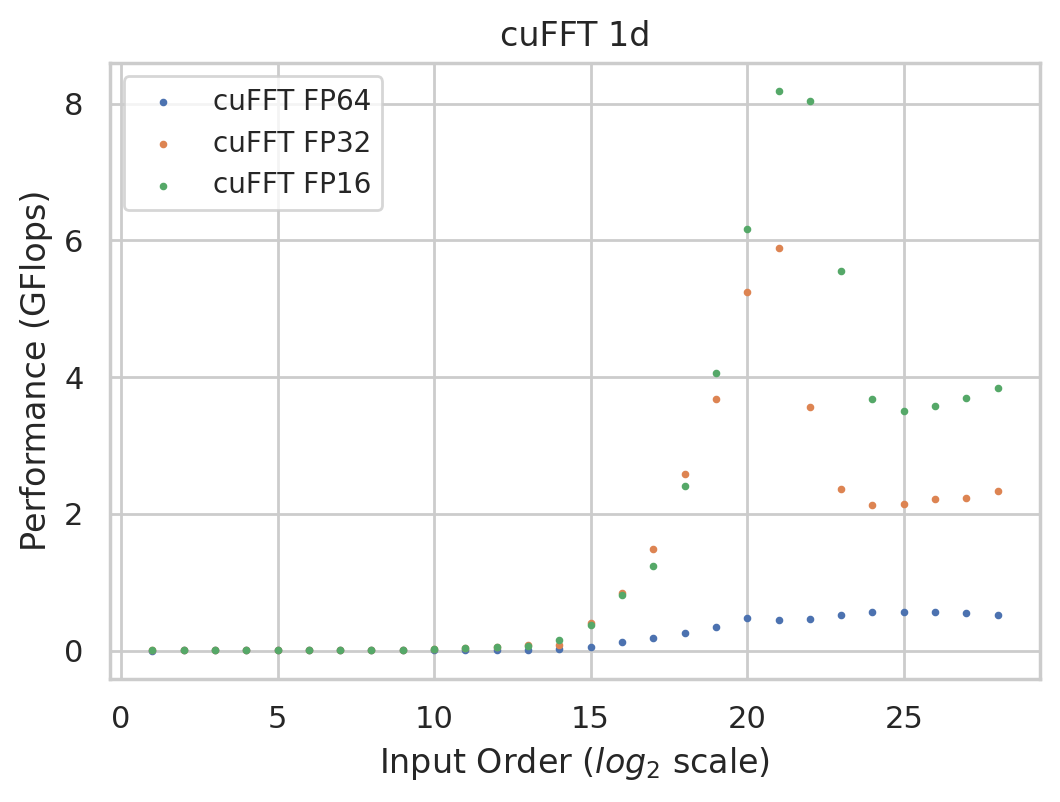

In [6]:
plt.figure(figsize=(6, 4), dpi=200)

dot_size = 3
legend_font_size = 10

plt.scatter(
    np.log2(cufft_64[cufft_64["pro"] == "1d"]["n"]),
    (cufft_64[cufft_64["pro"] == "1d"]["GFlops"]),
    label="cuFFT FP64",
    s=dot_size,
)

plt.scatter(
    np.log2(cufft_32[cufft_32["pro"] == "1d"]["n"]),
    (cufft_32[cufft_32["pro"] == "1d"]["GFlops"]),
    label="cuFFT FP32",
    s=dot_size,
)

plt.scatter(
    np.log2(cufft_16[cufft_16["pro"] == "1d"]["n"]),
    (cufft_16[cufft_16["pro"] == "1d"]["GFlops"]),
    label="cuFFT FP16",
    s=dot_size,
)

plt.legend(loc=2, fontsize=legend_font_size)

plt.title("cuFFT 1d")
plt.ylabel("Performance (GFlops)")
plt.xlabel("Input Order ($log_2$ scale)")

plt.show()

[2, 4, 16]


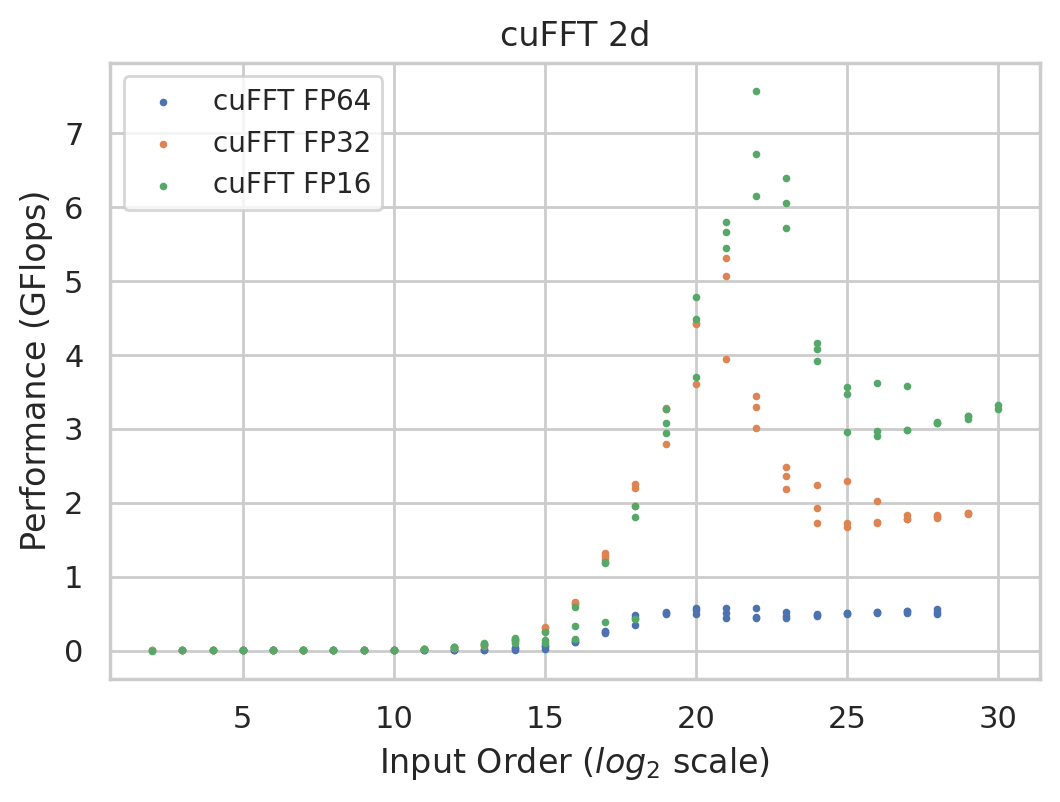

In [7]:
plt.figure(figsize=(6, 4), dpi=200)

dot_size = 3
legend_font_size = 10

# mask_2d = np.logspace(0,3,4,base=4)
mask_2d = [2, 4, 16]
print(mask_2d)

plt_2d_64 = cufft_64[cufft_64["pro"] == "2d"][cufft_64[cufft_64["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]
plt_2d_32 = cufft_32[cufft_32["pro"] == "2d"][cufft_32[cufft_32["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]
plt_2d_16 = cufft_16[cufft_16["pro"] == "2d"][cufft_16[cufft_16["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]

plt.scatter(
    np.log2(plt_2d_64["n"]),
    (plt_2d_64["GFlops"]),
    label="cuFFT FP64",
    s=dot_size,
)

plt.scatter(
    np.log2(plt_2d_32["n"]),
    (plt_2d_32["GFlops"]),
    label="cuFFT FP32",
    s=dot_size,
)

plt.scatter(
    np.log2(plt_2d_16["n"]),
    (plt_2d_16["GFlops"]),
    label="cuFFT FP16",
    s=dot_size,
)

plt.legend(loc=2, fontsize=legend_font_size)

plt.title("cuFFT 2d")
plt.ylabel("Performance (GFlops)")
plt.xlabel("Input Order ($log_2$ scale)")

plt.show()

[2, 4, 16]


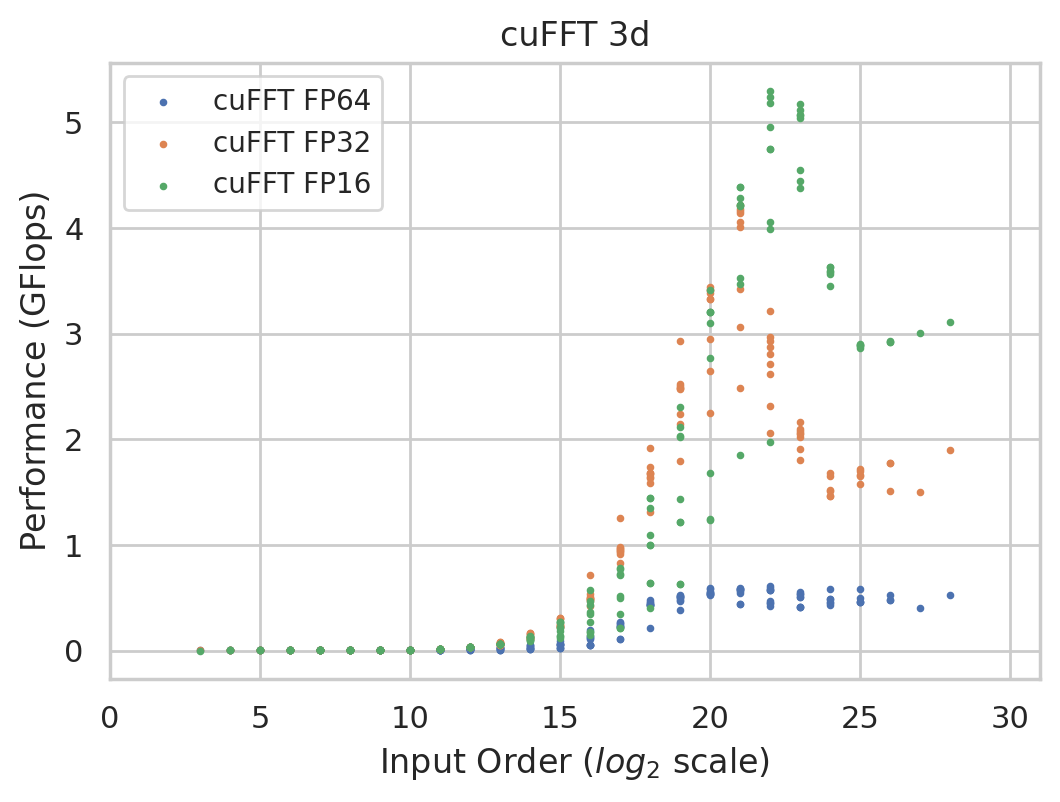

In [8]:
plt.figure(figsize=(6, 4), dpi=200)

dot_size = 3
legend_font_size = 10

mask_3d = [2, 4, 16]
print(mask_3d)

plt_3d_64 = cufft_64[cufft_64["pro"] == "3d"][cufft_64[cufft_64["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_32 = cufft_32[cufft_32["pro"] == "3d"][cufft_32[cufft_32["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_16 = cufft_16[cufft_16["pro"] == "3d"][cufft_16[cufft_16["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]

plt_3d_64 = plt_3d_64[plt_3d_64["y"].isin(mask_3d)]
plt_3d_32 = plt_3d_32[plt_3d_32["y"].isin(mask_3d)]
plt_3d_16 = plt_3d_16[plt_3d_16["y"].isin(mask_3d)]

plt.scatter(
    np.log2(plt_3d_64["n"]),
    (plt_3d_64["GFlops"]),
    label="cuFFT FP64",
    s=dot_size,
)

plt.scatter(
    np.log2(plt_3d_32["n"]),
    (plt_3d_32["GFlops"]),
    label="cuFFT FP32",
    s=dot_size,
)

plt.scatter(
    np.log2(plt_3d_16["n"]),
    (plt_3d_16["GFlops"]),
    label="cuFFT FP16",
    s=dot_size,
)

plt.legend(loc=2, fontsize=legend_font_size)
plt.xlim(0, 31)
# plt.ylim(-500, 10000)
plt.title("cuFFT 3d")
plt.ylabel("Performance (GFlops)")
plt.xlabel("Input Order ($log_2$ scale)")

plt.show()

## ncu Cache Analysis

In [9]:
import re

regex_L1 = '(?<="L1/TEX Cache Throughput","%",").[.0-9_]*'
regex_L2 = '(?<="L2 Cache Throughput","%",").[.0-9_]*'
regex_Me = '(?<="Memory Throughput","byte/second",").[.0-9_]*'
regex_Co = '(?<="Compute \(SM\) Throughput","%",").[.0-9_]*'


In [10]:
cufft_3d_L1 = []
cufft_3d_L2 = []
cufft_3d_Me = []
cufft_3d_Co = []

fileHandler = open("../data/ncu-cufft-3d-4090-t.csv", "r")

while True:
    line = fileHandler.readline()
    if not line:
        break

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    cufft_3d_L1.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    cufft_3d_L2.append(np.mean(num_list_new))

    str_select = re.findall(regex_Me, line)
    num_list_new = [float(i) for i in str_select]
    cufft_3d_Me.append(np.mean(num_list_new))

    str_select = re.findall(regex_Co, line)
    num_list_new = [float(i) for i in str_select]
    cufft_3d_Co.append(np.mean(num_list_new))

fileHandler.close()

cufft_3d_perf = pd.concat(
    [plt_3d_64[plt_3d_64["pro"] == "3d"], plt_3d_32[plt_3d_32["pro"] == "3d"]])
cufft_3d_perf = pd.concat([cufft_3d_perf, plt_3d_16[plt_3d_16["pro"] == "3d"]])

cufft_3d_perf = cufft_3d_perf.loc[:, ["pres", "x", "n", "GFlops"]]

cufft_3d_perf["L1"] = cufft_3d_L1
cufft_3d_perf["L2"] = cufft_3d_L2
cufft_3d_perf["Me"] = cufft_3d_Me
cufft_3d_perf["Co"] = cufft_3d_Co

print(cufft_3d_perf)

       pres        x          n    GFlops         L1         L2          Me  \
1303     64        2          8  0.000021  56.053333   0.743333   39.000000   
1306     64        2         16  0.000055  51.253333   0.703333  129.000000   
1312     64        2         64  0.000282  43.836667   0.723333  433.333333   
1384     64        2         16  0.000056  54.383333   0.756667  150.333333   
1387     64        2         32  0.000136  48.850000   0.756667  290.333333   
...     ...      ...        ...       ...        ...        ...         ...   
12487    16  1048576   16777216  3.627454  24.552000  40.618000  879.800000   
12493    16  1048576   67108864  2.917542  19.660000  36.710000  896.400000   
12523    16  1048576   33554432  2.878236  20.340000  38.658000  892.400000   
12526    16  1048576   67108864  2.918698  17.766000  36.714000  897.200000   
12532    16  1048576  268435456  3.105003  19.848000  35.246000  890.600000   

              Co  
1303    0.010000  
1306    0.023

In [11]:
cufft_3d_L1 = []
cufft_3d_L2 = []

regex_L1 = '(?<="L1/TEX Hit Rate","%",").[.0-9_]*'
regex_L2 = '(?<=L2 Hit Rate","%",").[.0-9_]*'

fileHandler = open("../data/ncu-cufft-3d-4090.csv", "r")

while True:
    line = fileHandler.readline()
    if not line:
        break

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    cufft_3d_L1.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    cufft_3d_L2.append(np.mean(num_list_new))

fileHandler.close()

cufft_3d_perf["L1_hit"] = cufft_3d_L1
cufft_3d_perf["L2_hit"] = cufft_3d_L2
print(cufft_3d_perf)

       pres        x          n    GFlops         L1         L2          Me  \
1303     64        2          8  0.000021  56.053333   0.743333   39.000000   
1306     64        2         16  0.000055  51.253333   0.703333  129.000000   
1312     64        2         64  0.000282  43.836667   0.723333  433.333333   
1384     64        2         16  0.000056  54.383333   0.756667  150.333333   
1387     64        2         32  0.000136  48.850000   0.756667  290.333333   
...     ...      ...        ...       ...        ...        ...         ...   
12487    16  1048576   16777216  3.627454  24.552000  40.618000  879.800000   
12493    16  1048576   67108864  2.917542  19.660000  36.710000  896.400000   
12523    16  1048576   33554432  2.878236  20.340000  38.658000  892.400000   
12526    16  1048576   67108864  2.918698  17.766000  36.714000  897.200000   
12532    16  1048576  268435456  3.105003  19.848000  35.246000  890.600000   

              Co     L1_hit     L2_hit  
1303    0.

In [12]:

plt_3d_64 = cufft_64[cufft_64["pro"] == "3d"][cufft_64[cufft_64["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_32 = cufft_32[cufft_32["pro"] == "3d"][cufft_32[cufft_32["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_16 = cufft_16[cufft_16["pro"] == "3d"][cufft_16[cufft_16["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]

plt_3d_64 = plt_3d_64[plt_3d_64["y"].isin(mask_3d)]
plt_3d_32 = plt_3d_32[plt_3d_32["y"].isin(mask_3d)]
plt_3d_16 = plt_3d_16[plt_3d_16["y"].isin(mask_3d)]
plt_3d_64["n"]=plt_3d_64["n"] * 8
plt_3d_32["n"]=plt_3d_32["n"] * 4
plt_3d_16["n"]=plt_3d_16["n"] * 2

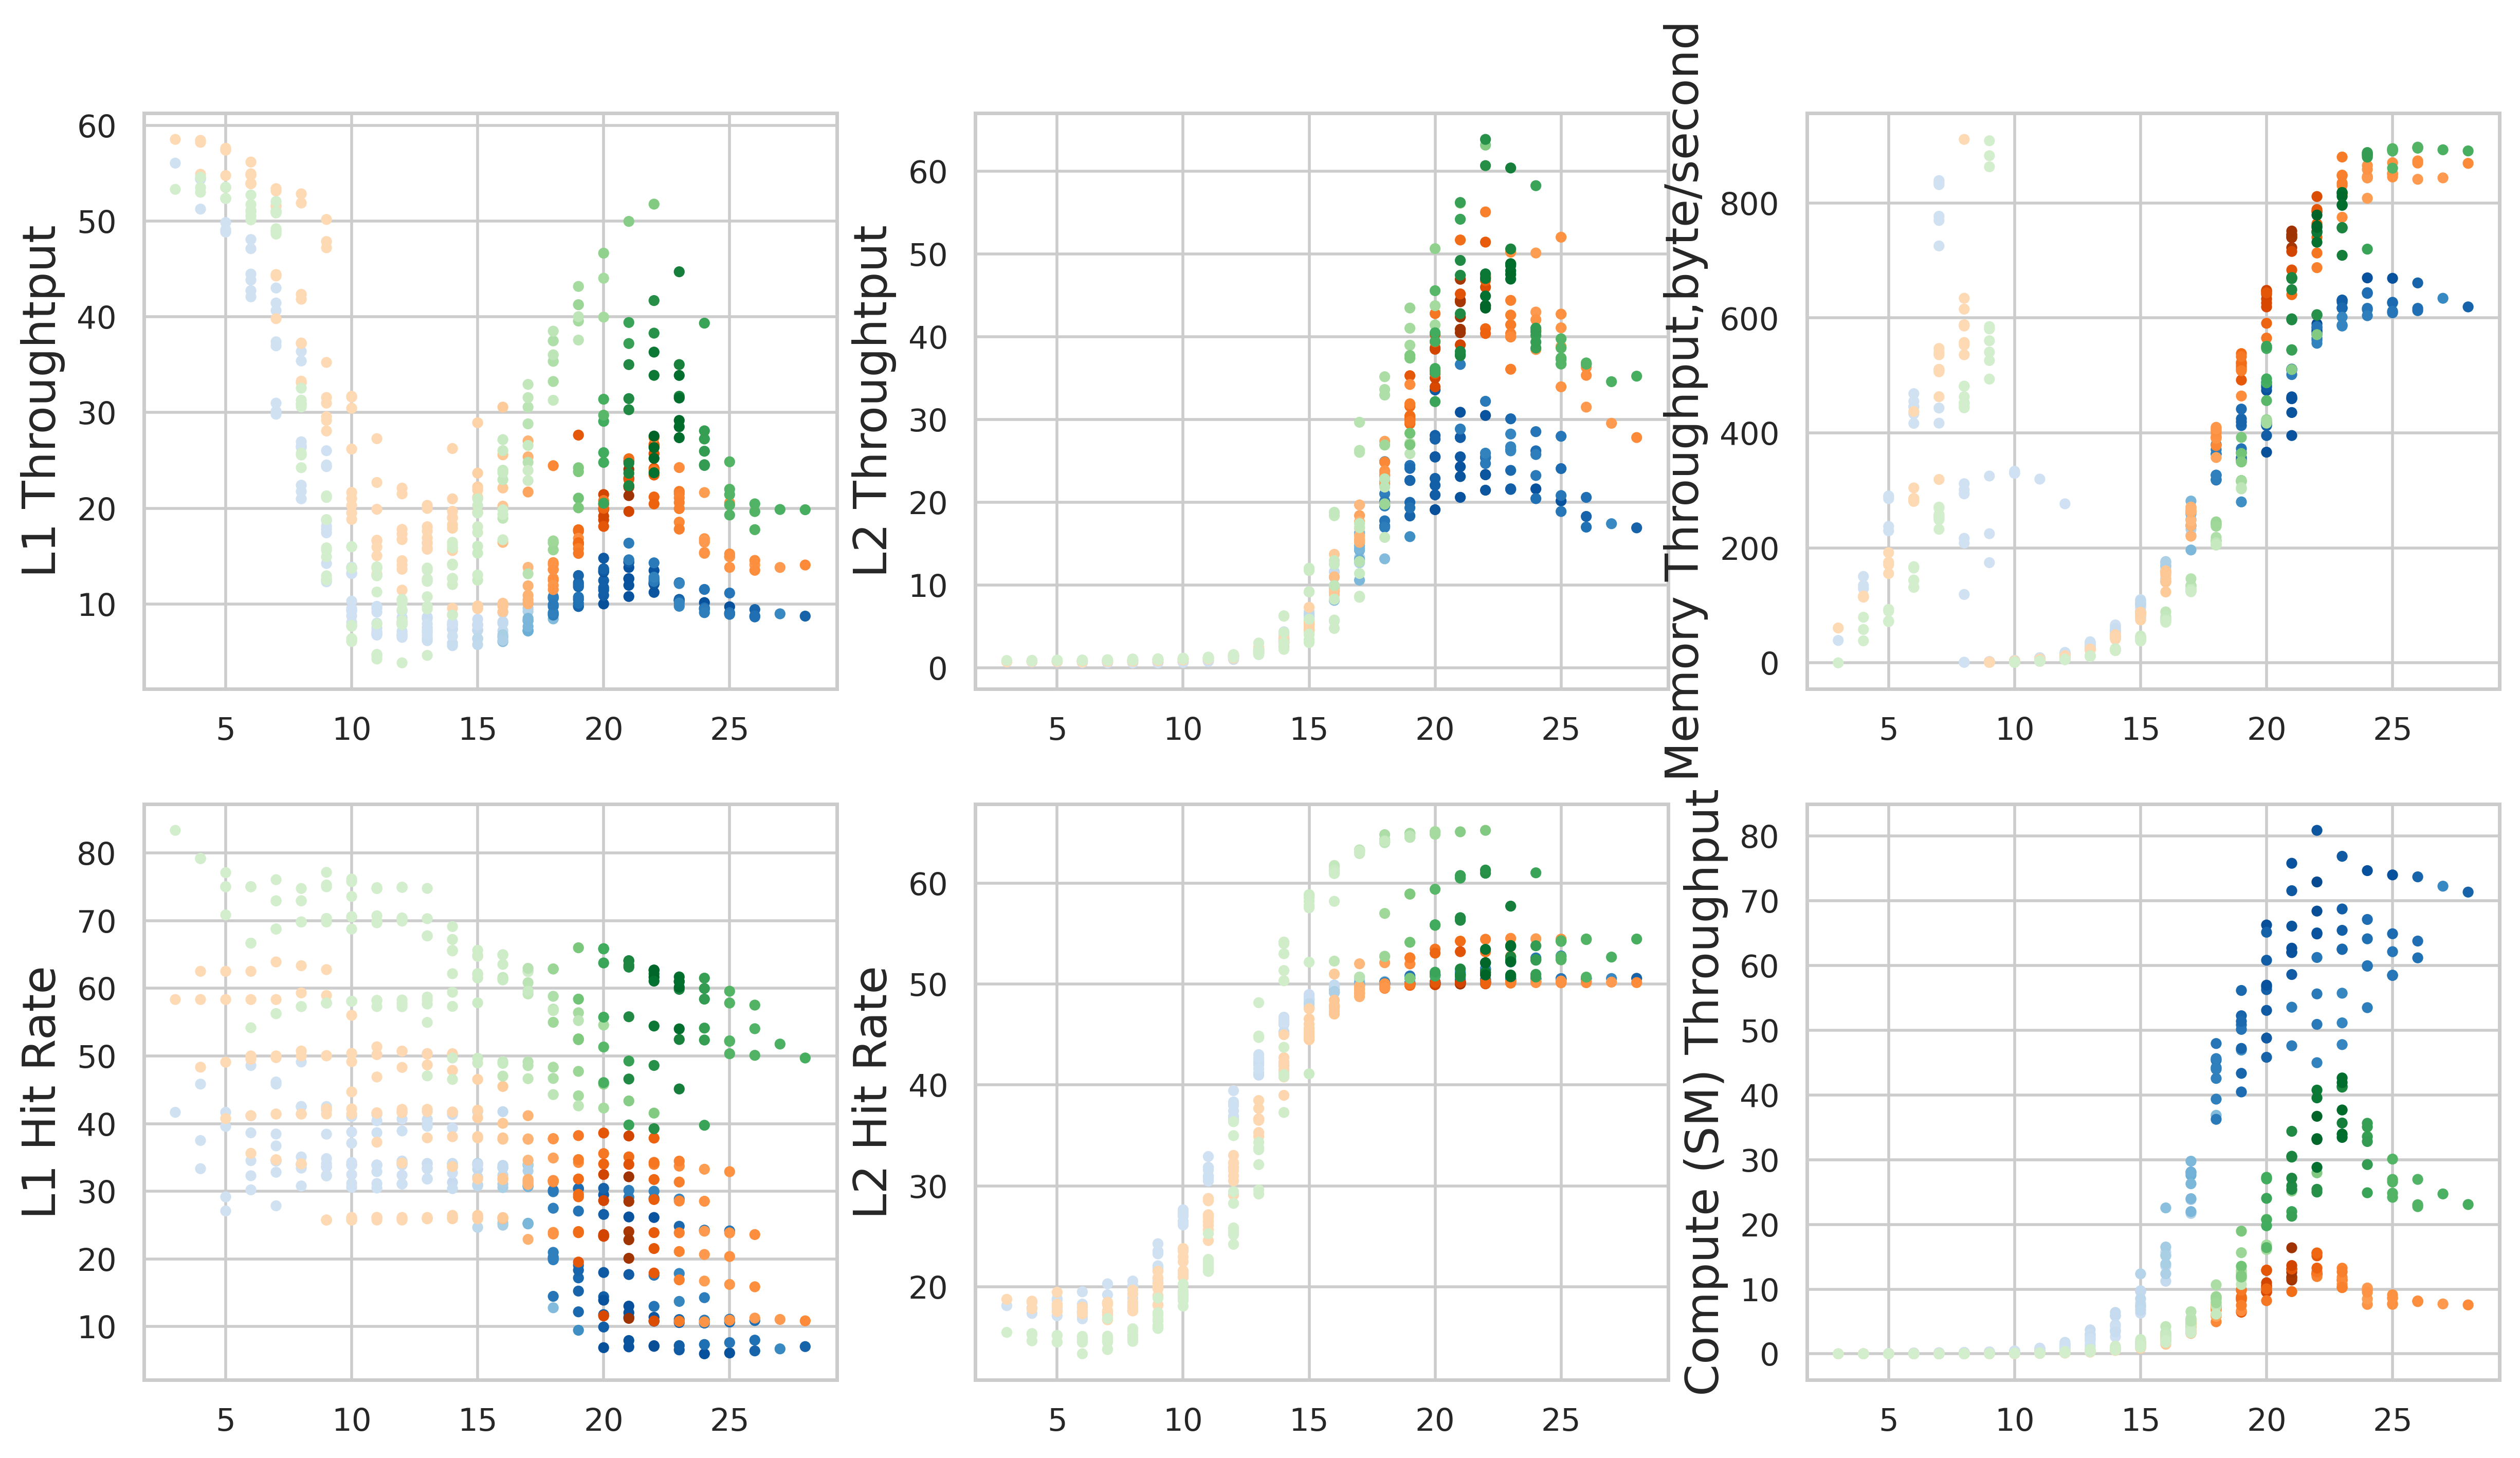

In [13]:
plt.figure(figsize=(20, 8), dpi=400)

mark_size = 8
legend_font_size = 10
tile_size = 16

# plt.subplots_adjust(right=None, left=None, wspace=0.15, hspace=0.05)

# plt.subplot(2, 4, 1)

# plt.scatter(np.log2(plt_3d_64["n"]), (plt_3d_64["GFlops"]),
#             label="cuFFT FP64",
#             s=dot_size,
#             c=(plt_3d_64["GFlops"]),
#             cmap=cmap_64)

# plt.scatter(np.log2(plt_3d_32["n"]), (plt_3d_32["GFlops"]),
#             label="cuFFT FP32",
#             s=dot_size,
#             c=(plt_3d_32["GFlops"]),
#             cmap=cmap_32)

# plt.scatter(np.log2(plt_3d_16["n"]), (plt_3d_16["GFlops"]),
#             label="cuFFT FP16",
#             s=dot_size,
#             c=(plt_3d_16["GFlops"]),
#             cmap=cmap_16)

# plt.legend(loc=2, fontsize=legend_font_size)
# plt.xlim(0, 32)
# plt.ylim(-0.5, 8.3)
# plt.ylabel("Performance (TFlops)")
# plt.xlabel("Input Data (Byte, $log_2$ scale)")

plt.subplot(2, 4, 2)


data_64 = cufft_3d_perf[cufft_3d_perf["pres"] == 64]
data_32 = cufft_3d_perf[cufft_3d_perf["pres"] == 32]
data_16 = cufft_3d_perf[cufft_3d_perf["pres"] == 16]

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["L1"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["L1"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["L1"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("L1 Throughtput", fontsize=tile_size)

plt.subplot(2, 4, 3)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["L2"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["L2"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["L2"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("L2 Throughtput", fontsize=tile_size)

plt.subplot(2, 4, 4)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["Me"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["Me"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["Me"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("Memory Throughput,byte/second", fontsize=tile_size)


plt.subplot(2, 4, 6)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["L1_hit"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["L1_hit"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["L1_hit"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("L1 Hit Rate", fontsize=tile_size)

plt.subplot(2, 4, 7)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["L2_hit"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["L2_hit"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["L2_hit"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("L2 Hit Rate", fontsize=tile_size)

plt.subplot(2, 4, 8)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["Co"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["Co"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["Co"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("Input Data (Byte, $log_2$ scale)", fontsize=tile_size)
plt.ylabel("Compute (SM) Throughput", fontsize=tile_size)
plt.show()


In [14]:

# data_16.to_csv("./data_16.csv", sep=',')
# data_32.to_csv("./data_32.csv", sep=',')
# data_64.to_csv("./data_64.csv", sep=',')


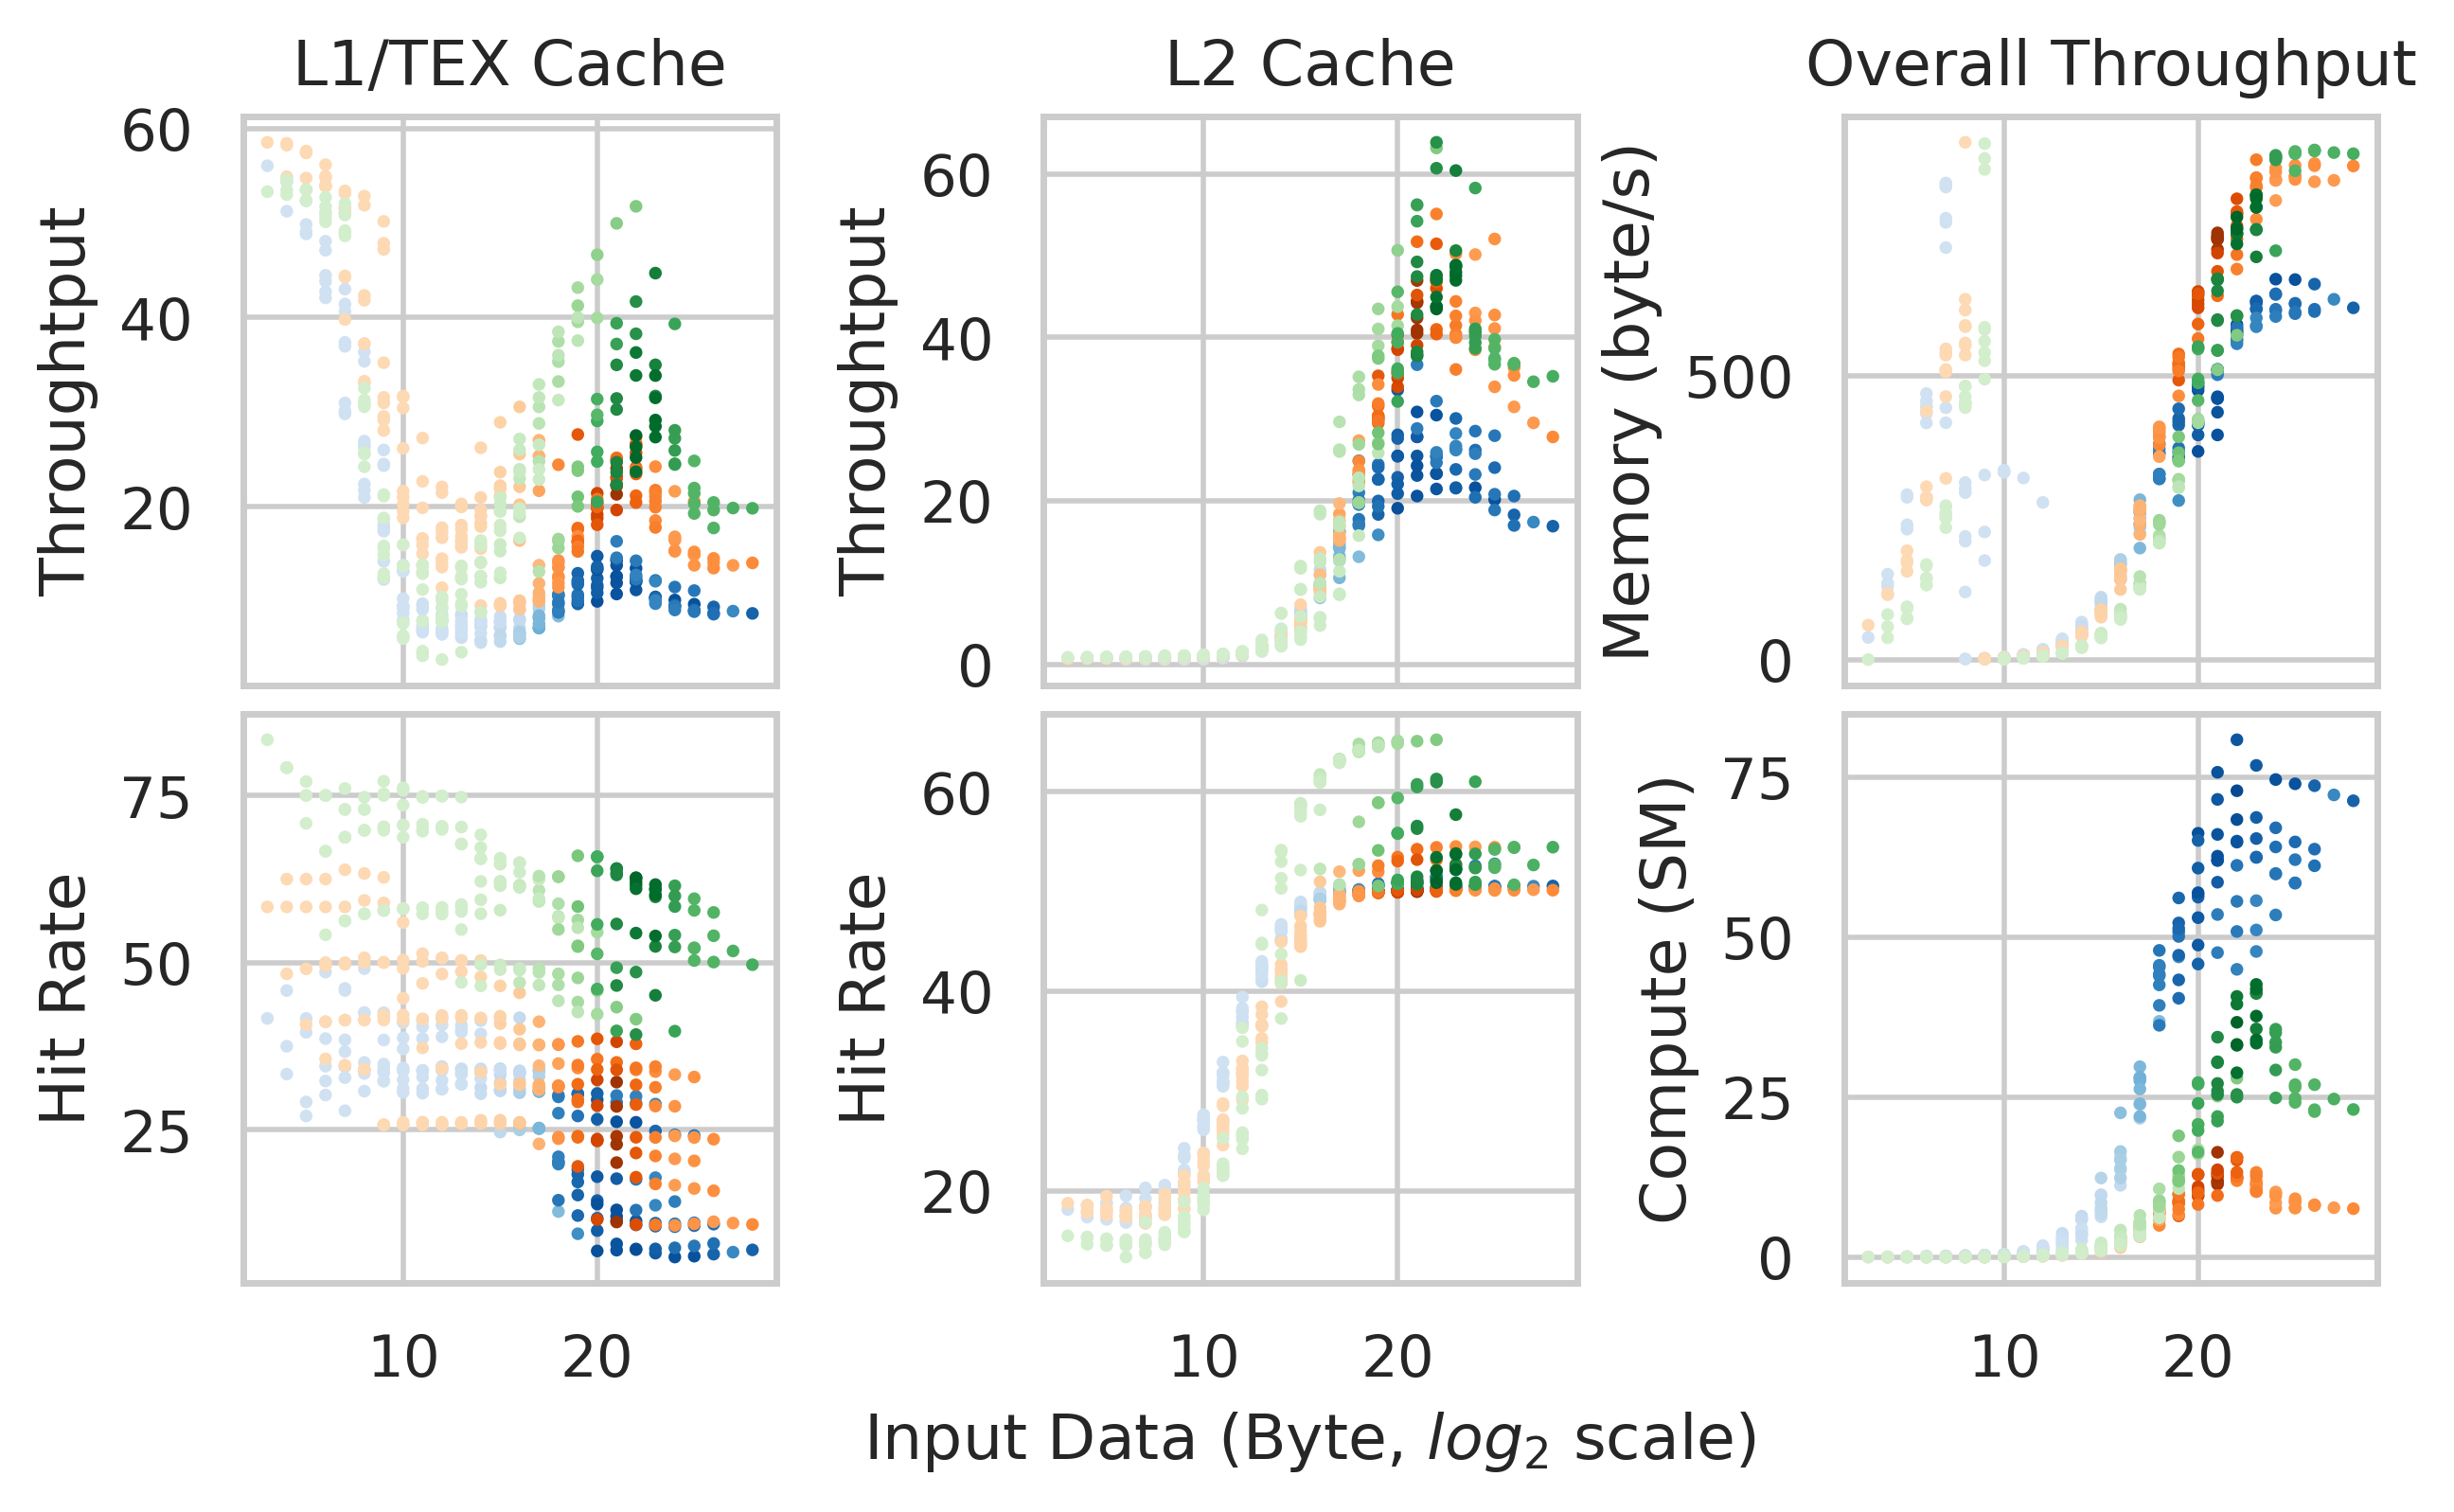

In [15]:
plt.figure(figsize=(10, 4), dpi=400)
plt.subplots_adjust(right=None, left=None, wspace=0.5, hspace=0.05)

mark_size = 2
legend_font_size = 10
tile_size = 16

plt.subplot(2, 4, 2)


data_64 = cufft_3d_perf[cufft_3d_perf["pres"] == 64]
data_32 = cufft_3d_perf[cufft_3d_perf["pres"] == 32]
data_16 = cufft_3d_perf[cufft_3d_perf["pres"] == 16]

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["L1"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["L1"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["L1"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("Throughtput")
plt.title("L1/TEX Cache")

plt.subplot(2, 4, 3)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["L2"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["L2"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["L2"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("Throughtput")
plt.title("L2 Cache")

plt.subplot(2, 4, 4)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["Me"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["Me"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["Me"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# plt.xlabel("Input Data (Byte, $log_2$ scale)")
# plt.ylabel("Memory, byte/second")
plt.ylabel("Memory (byte/s)")
plt.title("Overall Throughput")


plt.subplot(2, 4, 6)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["L1_hit"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["L1_hit"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["L1_hit"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("Hit Rate")

plt.subplot(2, 4, 7)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["L2_hit"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["L2_hit"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["L2_hit"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("Hit Rate")

plt.subplot(2, 4, 8)

fp64 = plt.scatter(np.log2(data_64["n"]),
                   data_64["Co"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(np.log2(data_32["n"]),
                   data_32["Co"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(np.log2(data_16["n"]),
                   data_16["Co"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("Input Data (Byte, $log_2$ scale)")
plt.ylabel("Compute (SM)")

plt.savefig("cuFFT3d_throughput_4090.pdf",
            dpi=400,
            format="pdf",
            bbox_inches='tight',
            pad_inches=0.0)